# Power Plant Energy Prediction AI Challenge

## 0 - Könyvtárak betöltése / Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 1 - Adatok betöltése

In [ ]:
df = pd.read_excel('Train.xlsx')
df.head()

,AT,V,AP,RH,PE
0,10.54,34.03,1018.71,74.00,478.77
1,7.08,39.99,1010.55,91.44,482.83
2,14.49,41.16,1000.50,82.17,465.24
3,10.73,25.36,1009.35,100.15,469.43
4,22.88,63.91,1009.63,87.82,442.50


In [ ]:
df.tail()

,AT,V,AP,RH,PE
8563,17.10,49.69,1005.53,81.82,457.32
8564,24.73,65.34,1015.42,52.80,446.92
8565,30.44,56.24,1005.19,56.24,429.34
8566,23.00,66.05,1020.61,80.29,421.57
8567,17.75,49.25,1020.86,63.67,454.41


In [ ]:
df.isna().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

## Az adatsor felosztása training és test halmazra / Splitting the dataset into the Training set and Test set

In [ ]:
df.iloc[:,-1] #ez lesz a train y

0       478.77
1       482.83
2       465.24
3       469.43
4       442.50
         ...  
8563    457.32
8564    446.92
8565    429.34
8566    421.57
8567    454.41
Name: PE, Length: 8568, dtype: float64

In [ ]:
df.iloc[:,:-1] #ez lesz a train x

,AT,V,AP,RH
0,10.54,34.03,1018.71,74.00
1,7.08,39.99,1010.55,91.44
2,14.49,41.16,1000.50,82.17
3,10.73,25.36,1009.35,100.15
4,22.88,63.91,1009.63,87.82
...,...,...,...,...
8563,17.10,49.69,1005.53,81.82
8564,24.73,65.34,1015.42,52.80
8565,30.44,56.24,1005.19,56.24
8566,23.00,66.05,1020.61,80.29


In [ ]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train.shape

(6854, 4)

In [ ]:
X_test.shape

(1714, 4)

In [ ]:
y_train.shape

(6854,)

In [ ]:
y_test.shape

(1714,)

##Skálázás

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

sc_y = StandardScaler()
y_train_sc = sc_y.fit_transform(y_train.reshape(len(y_train), 1))
y_test_sc = sc_y.transform(y_test.reshape(len(y_test), 1))


## 2 - Sklearn neural network - MLPRegressor

In [ ]:
from sklearn.neural_network import MLPRegressor

Activation functions: ['identity', 'logistic', 'relu', 'softmax', 'tanh']

In [ ]:
ne = MLPRegressor(hidden_layer_sizes=(150,120,50), activation='tanh', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', #0.9479
 learning_rate_init=0.001, power_t=0.5, max_iter=1000, shuffle=True, random_state=None, 
 tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, 
 validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)
ne.fit(X_train_sc,y_train_sc)
print(ne.score(X_train_sc,y_train_sc))
print(ne.score(X_test_sc,y_test_sc))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.947389974135969
0.9370408339386463


In [ ]:
ne = MLPRegressor(hidden_layer_sizes=(100,40,5,2,1), activation='logistic', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', #0,9431
 learning_rate_init=0.001, power_t=0.5, max_iter=1000, shuffle=True, random_state=None, 
 tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, 
 validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)
ne.fit(X_train_sc,y_train_sc)
print(ne.score(X_train_sc,y_train_sc))
print(ne.score(X_test_sc,y_test_sc))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.939339673667913
0.93598373822368


In [ ]:
ne = MLPRegressor(hidden_layer_sizes=(100,50,30,10), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', #0,952
 learning_rate_init=0.001, power_t=0.5, max_iter=1000, shuffle=True, random_state=None, 
 tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, 
 validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)
ne.fit(X_train_sc,y_train_sc)
print(ne.score(X_train_sc,y_train_sc))
print(ne.score(X_test_sc,y_test_sc))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9572198150234404
0.9432760623808832


###MLP Regressor minősítése

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
mean_squared_error(y_test_sc,ne.predict(X_test_sc))

0.053390437509808264

In [ ]:
r2_score(y_test_sc,ne.predict(X_test_sc))

0.9432760623808832

In [ ]:
np.sqrt(mean_squared_error(y_test_sc,ne.predict(X_test_sc)))

0.23106370876840063

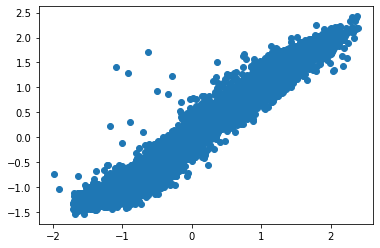

In [ ]:
y_train_predict_sc = ne.predict(X_train_sc)
plt.scatter(y_train_sc,y_train_predict_sc) 
plt.show()

## 3 - TensorFlow neural network

###Test/Validation felosztás a TensorFlow hálóhoz:

In [ ]:
X_training, X_validate, y_training, y_validate = train_test_split(X_train_sc, y_train_sc, test_size=0.1)

In [ ]:
X_training.shape

(6168, 4)

In [ ]:
X_validate.shape

(686, 4)

In [ ]:
X_train_sc.shape

(6854, 4)

In [ ]:
y_training.shape

(6168, 1)

In [ ]:
y_validate.shape

(686, 1)

### Inícializáljuk az ANN-t. 

In [ ]:
import tensorflow as tf


In [ ]:
ann = tf.keras.Sequential()



A bemeneti rétegben lévő neuronok számát nem kell megadnunk, azt a változól számából a modell automatikusan meghatározza.

Gyakori aktiválási függvények: relu, sigmoid, linear




In [ ]:
ann.add(tf.keras.layers.Dense(units=4, activation='sigmoid',name='Rejtett1'))

In [ ]:
ann.add(tf.keras.layers.Dense(units=10, activation='relu',name='Rejtett2'))

In [ ]:
ann.add(tf.keras.layers.Dense(units=1,name='Kimenet'))

In [ ]:
ann.compile(optimizer='adam',
              loss='mean_squared_error')

In [ ]:
res = ann.fit(X_training, y_training,validation_data=(X_validate, y_validate), epochs=100)

Epoch 1/100
193/193 [==============================] - 1s 2ms/step - loss: 0.9984 - val_loss: 0.6504
Epoch 2/100
193/193 [==============================] - 0s 2ms/step - loss: 0.3538 - val_loss: 0.1721
Epoch 3/100
193/193 [==============================] - 0s 2ms/step - loss: 0.1345 - val_loss: 0.1046
Epoch 4/100
193/193 [==============================] - 0s 2ms/step - loss: 0.1034 - val_loss: 0.0880
Epoch 5/100
193/193 [==============================] - 0s 2ms/step - loss: 0.0918 - val_loss: 0.0785
Epoch 6/100
193/193 [==============================] - 0s 2ms/step - loss: 0.0835 - val_loss: 0.0717
Epoch 7/100
193/193 [==============================] - 0s 2ms/step - loss: 0.0776 - val_loss: 0.0661
Epoch 8/100
193/193 [==============================] - 0s 2ms/step - loss: 0.0732 - val_loss: 0.0632
Epoch 9/100
193/193 [==============================] - 0s 2ms/step - loss: 0.0702 - val_loss: 0.0603
Epoch 10/100
193/193 [==============================] - 0s 2ms/step - loss: 0.0688 - val_lo

In [ ]:
ann = tf.keras.Sequential()
ann.add(tf.keras.layers.Dense(units=4, activation='linear',name='Rejtett1'))
ann.add(tf.keras.layers.Dense(units=10, activation='relu',name='Rejtett2'))
ann.add(tf.keras.layers.Dense(units=1,name='Kimenet'))
ann.compile(optimizer='adam',
              loss='mean_squared_error')
res = ann.fit(X_training, y_training,validation_data=(X_validate, y_validate), epochs=50)

Epoch 1/50
193/193 [==============================] - 1s 2ms/step - loss: 1.0591 - val_loss: 0.2093
Epoch 2/50
193/193 [==============================] - 0s 2ms/step - loss: 0.1518 - val_loss: 0.1258
Epoch 3/50
193/193 [==============================] - 0s 2ms/step - loss: 0.1170 - val_loss: 0.1042
Epoch 4/50
193/193 [==============================] - 0s 2ms/step - loss: 0.0983 - val_loss: 0.0886
Epoch 5/50
193/193 [==============================] - 0s 2ms/step - loss: 0.0857 - val_loss: 0.0782
Epoch 6/50
193/193 [==============================] - 0s 2ms/step - loss: 0.0774 - val_loss: 0.0712
Epoch 7/50
193/193 [==============================] - 0s 2ms/step - loss: 0.0720 - val_loss: 0.0683
Epoch 8/50
193/193 [==============================] - 0s 2ms/step - loss: 0.0686 - val_loss: 0.0632
Epoch 9/50
193/193 [==============================] - 0s 2ms/step - loss: 0.0665 - val_loss: 0.0627
Epoch 10/50
193/193 [==============================] - 0s 2ms/step - loss: 0.0653 - val_loss: 0.0619

In [ ]:
ann = tf.keras.Sequential()
ann.add(tf.keras.layers.Dense(units=4, activation='linear',name='Rejtett1'))
ann.add(tf.keras.layers.Dense(units=10, activation='sigmoid',name='Rejtett2'))
ann.add(tf.keras.layers.Dense(units=1,name='Kimenet'))
ann.compile(optimizer='adam',
              loss='mean_squared_error')
res = ann.fit(X_training, y_training,validation_data=(X_validate, y_validate), epochs=50)

Epoch 1/50
193/193 [==============================] - 1s 2ms/step - loss: 0.4536 - val_loss: 0.2062
Epoch 2/50
193/193 [==============================] - 0s 2ms/step - loss: 0.1664 - val_loss: 0.1337
Epoch 3/50
193/193 [==============================] - 0s 2ms/step - loss: 0.1280 - val_loss: 0.1082
Epoch 4/50
193/193 [==============================] - 0s 2ms/step - loss: 0.1058 - val_loss: 0.0878
Epoch 5/50
193/193 [==============================] - 0s 2ms/step - loss: 0.0887 - val_loss: 0.0737
Epoch 6/50
193/193 [==============================] - 0s 2ms/step - loss: 0.0773 - val_loss: 0.0651
Epoch 7/50
193/193 [==============================] - 0s 2ms/step - loss: 0.0718 - val_loss: 0.0620
Epoch 8/50
193/193 [==============================] - 0s 2ms/step - loss: 0.0695 - val_loss: 0.0611
Epoch 9/50
193/193 [==============================] - 0s 2ms/step - loss: 0.0686 - val_loss: 0.0600
Epoch 10/50
193/193 [==============================] - 0s 2ms/step - loss: 0.0680 - val_loss: 0.0597

###TensorFlow neurális háló értékelése

In [ ]:
mean_squared_error(y_test_sc,ann.predict(X_test_sc))

0.06194681082164733

In [ ]:
r2_score(y_test_sc,ann.predict(X_test_sc))

0.934185460980633

In [ ]:
np.sqrt(mean_squared_error(y_test_sc,ann.predict(X_test_sc)))

0.24889116260254668

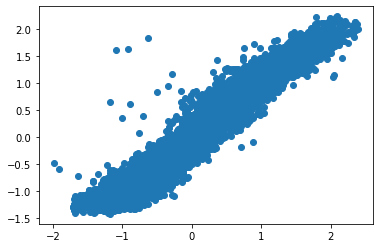

In [ ]:
y_training_pred_sc = ann.predict(X_training)
plt.scatter(y_training,y_training_pred_sc) 
plt.show()

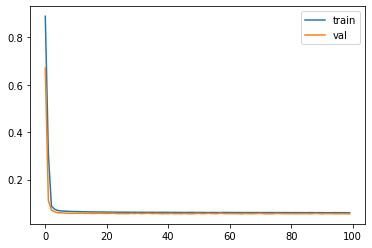

In [ ]:
plt.plot(np.arange(len(res.history['loss'])),res.history['loss'],label='train')
plt.plot(np.arange(len(res.history['loss'])),res.history['val_loss'],label='val')
plt.legend()
plt.show()

In [ ]:
res.history

{'loss': [0.8890132308006287,
  0.3079295754432678,
  0.08822302520275116,
  0.07522939890623093,
  0.07005469501018524,
  0.06803518533706665,
  0.06738156825304031,
  0.0666625127196312,
  0.06607624888420105,
  0.06551756709814072,
  0.06539314240217209,
  0.06511389464139938,
  0.06460445374250412,
  0.06447383761405945,
  0.06417238712310791,
  0.06384041160345078,
  0.06367062032222748,
  0.06345322728157043,
  0.0635431557893753,
  0.06348263472318649,
  0.06297717243432999,
  0.06300795078277588,
  0.06304487586021423,
  0.06275997310876846,
  0.06257550418376923,
  0.062706857919693,
  0.06259561330080032,
  0.062494341284036636,
  0.06250222772359848,
  0.062388140708208084,
  0.062302254140377045,
  0.062289465218782425,
  0.062211137264966965,
  0.06214606389403343,
  0.06219011917710304,
  0.062183305621147156,
  0.06203032284975052,
  0.061927687376737595,
  0.06201767548918724,
  0.06202396750450134,
  0.06192212179303169,
  0.06175752356648445,
  0.06177574023604393,
  

Vizualizáljuk a hálót!

https://www.tensorflow.org/api_docs/python/tf/keras/utils/plot_model



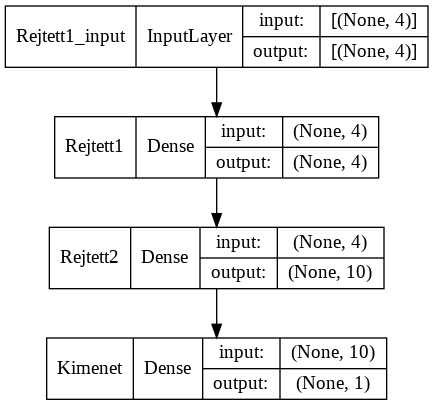

In [ ]:
tf.keras.utils.plot_model(
    ann, to_file='model.png', show_shapes=True, show_dtype=False,
    show_layer_names=True)

## 4 - Érzékenységvizsgálat a modellekkel

A modellek lehetőséget adnak, hogy megvizsgáljuk az egyes paraméterek hatását a kimenetre, illetve adott esetben olyan bemeneti adatok hatását is képesek predikálni, amik nem szerepeltek a tanítási mintában (természetesen ilyenkor az eredményeket megfelelő *mérnöki* kritikával kell fogadni).

Esetünkben rögzítsük le a tanítási mintában lévő változók átlagát egy X0 vektorba! Ezt követően megnézzük, hogy egy éppen vizsgált "var" változó milyen tartományban mozog a tanítási mintában, majd ebben a tartományban változtassunk csak ennek a változónak az értékét az X0 vektorban és futtassuk le a neurális hálót minden egyes ilyen értéknél. Így láthatjuk, hogy csak annak a változónak mi a hatása a kimenetre.

In [ ]:
X0=np.mean(X_training,axis=0)

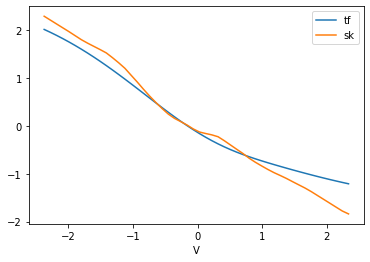

In [ ]:
var=0 #Def. of which variables we would like to study 

x_var_range=np.linspace(min(X_training[:,var]),max(X_training[:,var]),50) #definition of the range we are interested in 
x_var_range_n = x_var_range

y_sens_tf=[]   
y_sens_sk=[] 
for i in range(0,len(x_var_range)):
     X_p=X0.copy()
     X_p[var] = x_var_range_n[i]
     y_p_tf = ann.predict(X_p.reshape(1,len(X_p))) #tensorflow-val
     y_p_sk = ne.predict([X_p]) #sklearn-el
     y_sens_tf.append(y_p_tf[0])
     y_sens_sk.append(y_p_sk[0])

    
plt.plot(x_var_range,y_sens_tf,label='tf')
plt.plot(x_var_range,y_sens_sk,label='sk')
plt.xlabel(df.columns[var+1])
plt.legend()
plt.show()

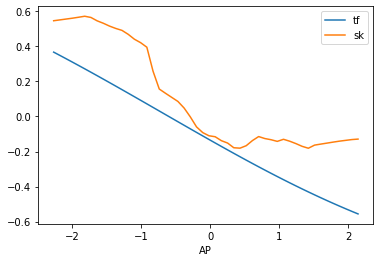

In [ ]:
var=1 #Def. of which variables we would like to study 

x_var_range=np.linspace(min(X_training[:,var]),max(X_training[:,var]),50) #definition of the range we are interested in 
x_var_range_n = x_var_range

y_sens_tf=[]   
y_sens_sk=[] 
for i in range(0,len(x_var_range)):
     X_p=X0.copy()
     X_p[var] = x_var_range_n[i]
     y_p_tf = ann.predict(X_p.reshape(1,len(X_p)))
     y_p_sk = ne.predict([X_p])
     y_sens_tf.append(y_p_tf[0])
     y_sens_sk.append(y_p_sk[0])

    
plt.plot(x_var_range,y_sens_tf,label='tf')
plt.plot(x_var_range,y_sens_sk,label='sk')
plt.xlabel(df.columns[var+1])
plt.legend()
plt.show()

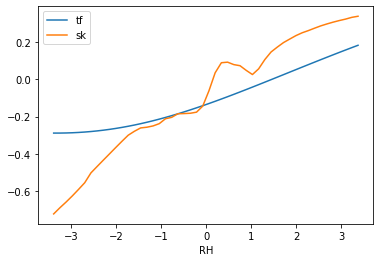

In [ ]:
var=2 #Def. of which variables we would like to study 

x_var_range=np.linspace(min(X_training[:,var]),max(X_training[:,var]),50) #definition of the range we are interested in 
x_var_range_n = x_var_range

y_sens_tf=[]   
y_sens_sk=[] 
for i in range(0,len(x_var_range)):
     X_p=X0.copy()
     X_p[var] = x_var_range_n[i]
     y_p_tf = ann.predict(X_p.reshape(1,len(X_p)))
     y_p_sk = ne.predict([X_p])
     y_sens_tf.append(y_p_tf[0])
     y_sens_sk.append(y_p_sk[0])

    
plt.plot(x_var_range,y_sens_tf,label='tf')
plt.plot(x_var_range,y_sens_sk,label='sk')
plt.xlabel(df.columns[var+1])
plt.legend()
plt.show()

##5 - Decision Tree Regressor - Döntési fa

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor_RT = DecisionTreeRegressor(max_depth=5)
regressor_RT.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5)

In [ ]:
y_train_pred_RT = regressor_RT.predict(X_train)
y_test_pred_RT = regressor_RT.predict(X_test)

In [ ]:
MAE_test = mean_absolute_error(y_test,y_test_pred_RT)
MSE_test = mean_squared_error(y_test,y_test_pred_RT)
RMSE_test = np.sqrt(mean_squared_error(y_test,y_test_pred_RT))
R2_test = r2_score(y_test,y_test_pred_RT)

N = X_test.shape[0]
K = X_test.shape[1]

R2_adj_test = 1-(1-R2_test)*((N-1)/(N-K))
print('MAE',MAE_test)
print('MSE',MSE_test)
print('RMSE',RMSE_test)
print('R2',R2_test)

print('R2adj',R2_adj_test)

MAE 3.5408760660627654
MSE 20.816554210588002
RMSE 4.562516214830146
R2 0.925396513124953
R2adj 0.9252656298146459


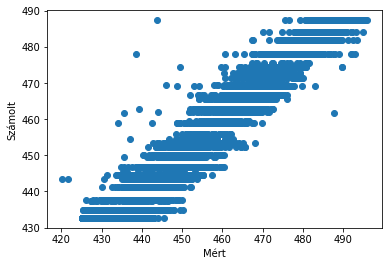

In [ ]:
plt.scatter(y_train,y_train_pred_RT)
plt.xlabel('Mért')
plt.ylabel('Számolt')
plt.show()

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
r2_cv = pd.DataFrame(index=range(2,30),columns=['train','valid'])
for d in range(2,30):
  kf = KFold(n_splits=10)
  r2_tr = []
  r2_valid = []
  for train,valid in kf.split(X_train):
    regressor_RT = DecisionTreeRegressor(max_depth=d)
    regressor_RT.fit(X_train[train,:],y_train[train])
    r2_tr.append(r2_score(y_train[train],regressor_RT.predict(X_train[train,:])))
    r2_valid.append(r2_score(y_train[valid],regressor_RT.predict(X_train[valid,:])))

  r2_cv.loc[d,'train'] = np.mean(r2_tr)
  r2_cv.loc[d,'valid'] = np.mean(r2_valid)

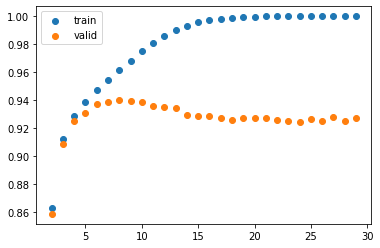

In [ ]:
plt.scatter(r2_cv.index,r2_cv['train'],label='train')
plt.scatter(r2_cv.index,r2_cv['valid'],label='valid')
plt.legend()
plt.show()

In [ ]:
regressor_RT = DecisionTreeRegressor(max_depth=9)
regressor_RT.fit(X_train,y_train)
y_test_pred_RT = regressor_RT.predict(X_test)


MAE_test = mean_absolute_error(y_test,y_test_pred_RT)
MSE_test = mean_squared_error(y_test,y_test_pred_RT)
RMSE_test = np.sqrt(mean_squared_error(y_test,y_test_pred_RT))
R2_test = r2_score(y_test,y_test_pred_RT)

N = X_test.shape[0]
K = X_test.shape[1]

R2_adj_test = 1-(1-R2_test)*((N-1)/(N-K))
print('MAE',MAE_test)
print('MSE',MSE_test)
print('RMSE',RMSE_test)
print('R2',R2_test)

print('R2adj',R2_adj_test)

MAE 3.072067466974583
MSE 18.94347062530565
RMSE 4.352409749243016
R2 0.9321093708465927
R2adj 0.9319902644796569


##6 - Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
regressor_RF = RandomForestRegressor(n_estimators=40)
regressor_RF.fit(X_train,y_train)

RandomForestRegressor(n_estimators=40)

In [ ]:
y_test_pred_RF = regressor_RF.predict(X_test)


MAE_test = mean_absolute_error(y_test,y_test_pred_RF)
MSE_test = mean_squared_error(y_test,y_test_pred_RF)
RMSE_test = np.sqrt(mean_squared_error(y_test,y_test_pred_RF))
R2_test = r2_score(y_test,y_test_pred_RF)

N = X_test.shape[0]
K = X_test.shape[1]

R2_adj_test = 1-(1-R2_test)*((N-1)/(N-K))
print('MAE',MAE_test)
print('MSE',MSE_test)
print('RMSE',RMSE_test)
print('R2',R2_test)

print('R2adj',R2_adj_test)

MAE 2.469560968494753
MSE 12.330011652785892
RMSE 3.5114116324899722
R2 0.9558110409051314
R2adj 0.9557335164154912


##7 - K-Nearest Neighbors Regression

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
regressor_KNN = KNeighborsRegressor(n_neighbors=7)
regressor_KNN.fit(X_train_sc,y_train_sc)

KNeighborsRegressor(n_neighbors=7)

In [ ]:
y_test_pred_KNN = regressor_KNN.predict(X_test_sc)


MAE_test = mean_absolute_error(y_test_sc,y_test_pred_KNN)
MSE_test = mean_squared_error(y_test_sc,y_test_pred_KNN)
RMSE_test = np.sqrt(mean_squared_error(y_test_sc,y_test_pred_KNN))
R2_test = r2_score(y_test_sc,y_test_pred_KNN)

N = X_test.shape[0]
K = X_test.shape[1]

R2_adj_test = 1-(1-R2_test)*((N-1)/(N-K))
print('MAE',MAE_test)
print('MSE',MSE_test)
print('RMSE',RMSE_test)
print('R2',R2_test)

print('R2adj',R2_adj_test)

MAE 0.1685316559726468
MSE 0.054513868488407884
RMSE 0.2334820517478975
R2 0.9420824885552752
R2adj 0.941980878886074
